# Compare Speed between Carpet and CarpetX

In [1]:
using Plots, Printf
theme(:wong2)
using LaTeXStrings
include("../Utils/misc-stdout.jl")

Main.MiscStdout

## Speed

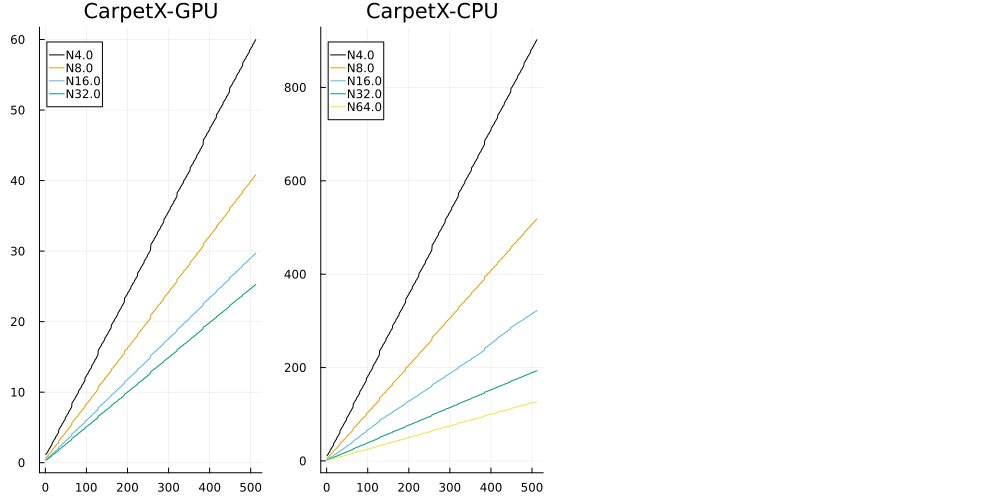

In [2]:
let patt_dirss = [
        ([
            (r"q1-Z4cowGPU-N\d+_r0000", "CarpetX-GPU"),
        ], "../../data/ScalingTest/CarpetX/vista/gcc-nvcc-tune", :cross),
        ([
            (r"q1-Z4cowGPU-interprocsonly-N\d+-MPI\d+_r0000", "CarpetX-CPU"),
        ], "../../data/ScalingTest/CarpetX/frontera/OMP2", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = MiscStdout.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1000,500))
    display(plt)
end

## Scaling

#### Data of Carpet

In [3]:
# M/hour
dat_carpet_OMP1 = [
    [4,  4.3064681],
    [8,  7.0979425],
    [16, 10.5277862],
    [32, 7.7146006],
];
dat_carpet_OMP2 = [
    [4,  4.0663858],
    [8,  7.3131888],
    [16, 11.7785155],
    [32, 13.9809398],
    [64, 14.4006936],
];

#### Data of CarpetX

M/day:
  CarpetX-GPU: [ 2.44e+03, 3.58e+03, 4.92e+03, 5.77e+03]
  CarpetX-CPU: [ 1.61e+02, 2.81e+02, 4.51e+02, 7.52e+02, 1.14e+03]


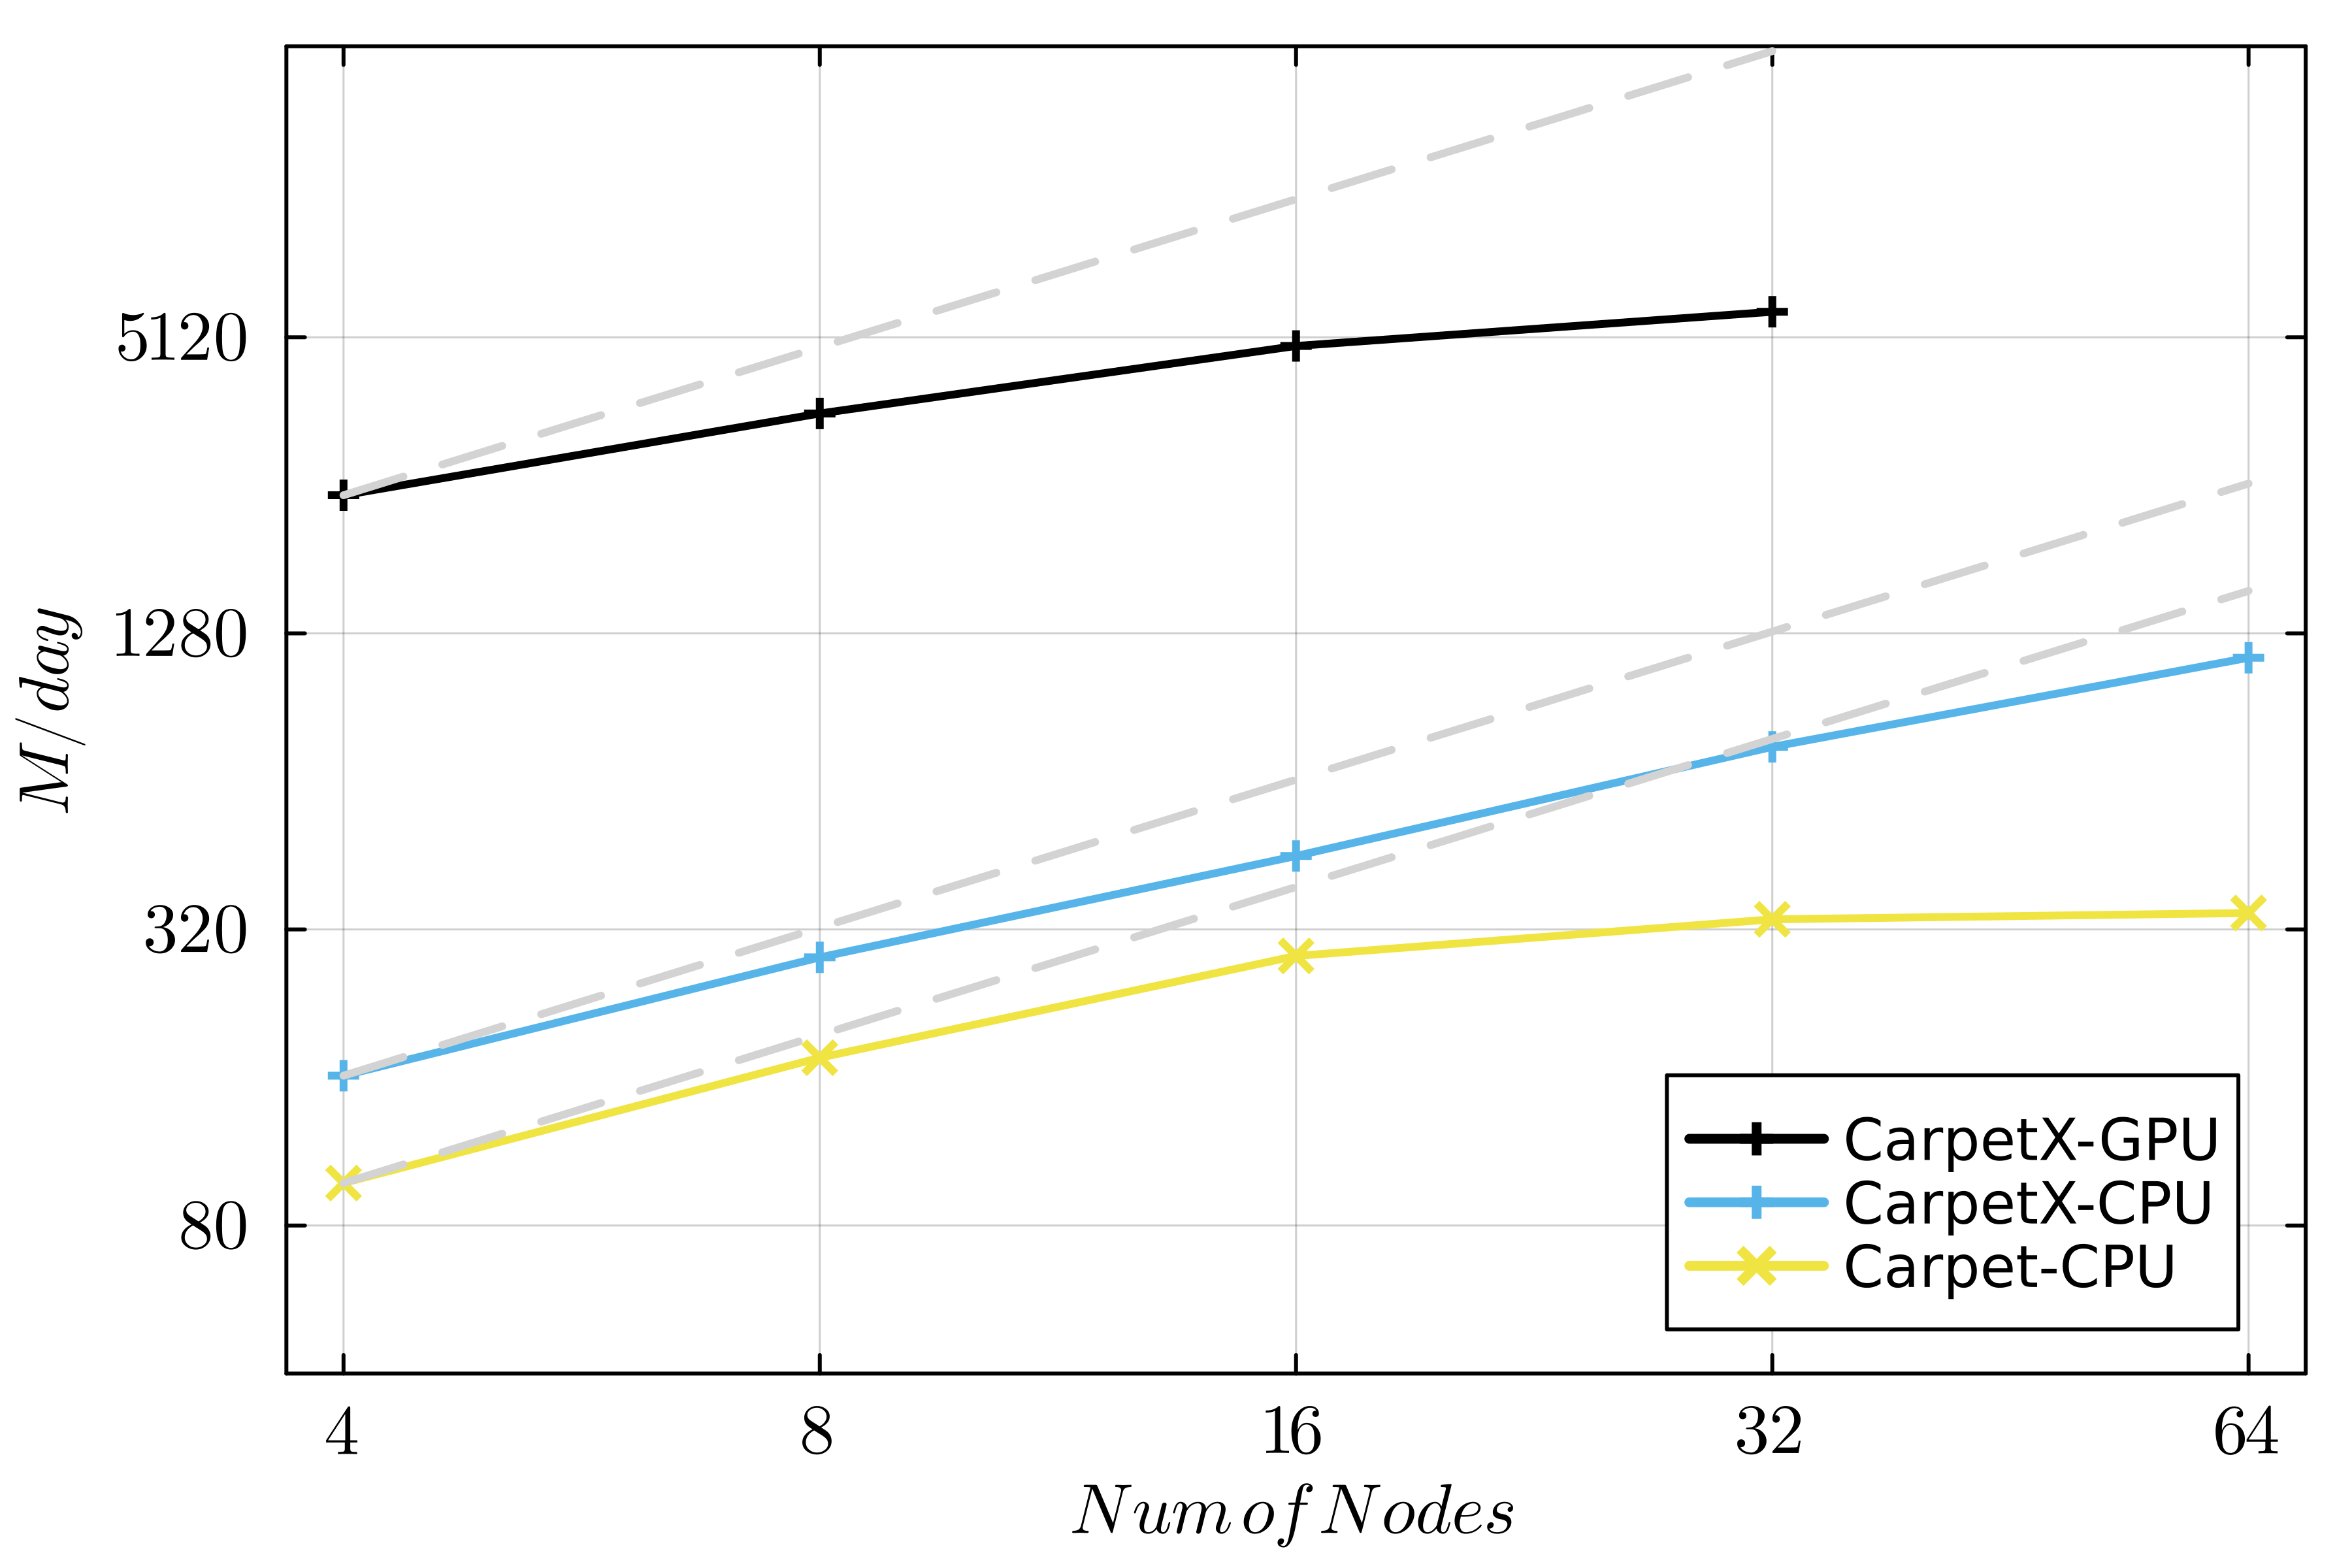

In [37]:
let patt_dirss = [
        ([
            (r"q1-Z4cowGPU-N\d+_r0000", "CarpetX-GPU"),
        ], "../../data/ScalingTest/CarpetX/vista/gcc-nvcc-tune", :cross),
        ([
            (r"q1-Z4cowGPU-interprocsonly-N\d+-MPI\d+_r0000", "CarpetX-CPU"),
        ], "../../data/ScalingTest/CarpetX/frontera/OMP2", :cross),
    ]
    
    # Plot M/day
    plt1 = plot(xlabel=L"Num\, of\, Nodes", ylabel=L"M/day", framestyle=:box,
                xscale=:log10, yscale=:log10,
                ylim=(40, 20000),
                legend=:bottomright,
                #legend_position=(0.8, 0.85)
               )
    plt1 = plot!(framestyle=:box,
                 titlefontsize=14,
                 guidefontsize=12,
                 tickfontsize=12,
                 legendfontsize=10)
    xs = [4, 8, 16, 32, 64]
    xticks!(plt1, xs, [L"%$(n)" for n in xs])
    ys = [80, 320, 1280, 5120]
    yticks!(plt1, ys, [L"%$(n)" for n in ys])
    # Process datasets
    println("M/day:")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "TotalComputeTime")
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt1, dat[1], dat[2], label = labs[i], marker = mark, linewidth=2)
            plot!(plt1, dat[1], dat[2][1] .* dat[1]/4, label="", linestyle=:dash, linewidth=2, color=:lightgray)
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")
        end
    end

    # Carpet
    plot!(plt1, [d[1] for d in dat_carpet_OMP2], [d[2] for d in dat_carpet_OMP2] * 24,
          marker=:xcross, label="Carpet-CPU", linewidth=2)
    plot!(plt1, [d[1] for d in dat_carpet_OMP2], (dat_carpet_OMP2[1][2] * 24) .* [d[1] for d in dat_carpet_OMP2]/4,
          linewidth=2, linestyle=:dash, label="", color=:lightgray)

    plot!(plt1, size=(600,400), dpi=600)

    # Display
    # savefig(plt1, "CompareCarpetAndX.pdf")
    display(plt1)
end